In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 diclist = {"product_id": object,"store_id": object,"date": object, "sales":float, "revenue": float, "stock":float, "price":float,"promo_type_1":object, "promo_bin_1":object,"promo_type_2":object, "promo_bin_2":object, "promo_discount_2":object, "promo_discount_type_2": object }

In [3]:
 df = pd.read_csv("Downloads/sales.csv", dtype= diclist, sep= ",")

In [5]:
df.head()

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [6]:
df['date'] =  pd.to_datetime(df['date'])

In [7]:
df = df.set_index('date')
df = df.sort_index()

In [8]:
# Elimina la distinción de tienda que no se va tener en cuenta, sino cantidad
# total de la empresa

df = df.drop(columns=['store_id'])
df.head()

,product_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,
2017-01-02,P0001,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,1.0,5.30,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,2.0,10.59,0.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,0.0,0.00,6.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0001,0.0,0.00,1.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN


In [9]:
# Filtramos el producto deseado, en este caso el más repetido

data = df[df['product_id'] == 'P0125']
data.head()

,product_id,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
date,,,,,,,,,,,
2017-01-02,P0125,0.0,0.0,22.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,58.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,15.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,42.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN
2017-01-02,P0125,0.0,0.0,44.0,2.45,PR14,NaN,PR03,NaN,NaN,NaN


In [10]:
# Crea una frecuencia semanal para la serie temporal

data2 = data.resample('W').sum()
data2

,sales,revenue,stock,price
date,,,,
2017-01-08,376.0,994.58,34793.0,2082.95
2017-01-15,454.0,1217.27,36603.0,2159.55
2017-01-22,493.0,1349.65,38272.0,2197.75
2017-01-29,543.0,1480.31,38744.0,2209.55
2017-02-05,490.0,1338.00,37880.0,2174.15
...,...,...,...,...
2019-12-01,0.0,0.00,0.0,3427.75
2019-12-08,0.0,0.00,0.0,3441.15
2019-12-15,0.0,0.00,0.0,3446.10


Text(0.5, 1.0, 'Grafico de ganancias')

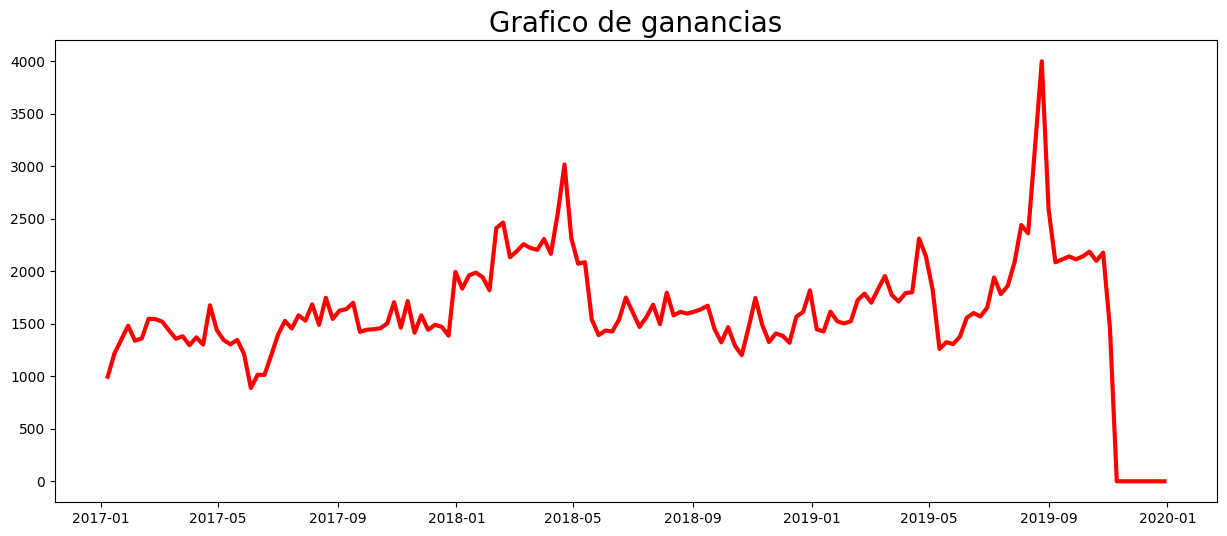

In [11]:
# Genera la gráfica de ganacias hasta la última fecha con dato

plt.figure(figsize=(15,6))
plt.plot(data2.revenue, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

In [12]:
# Crea la variable con que contiene solo las ganancias hasta la última fecha
# con dato

data3 = data2.revenue.loc[:'2019-11-03']
data3

date
2017-01-08     994.58
2017-01-15    1217.27
2017-01-22    1349.65
2017-01-29    1480.31
2017-02-05    1338.00
               ...   
2019-10-06    2139.97
2019-10-13    2185.91
2019-10-20    2097.94
2019-10-27    2176.15
2019-11-03    1455.65
Freq: W-SUN, Name: revenue, Length: 148, dtype: float64

Text(0.5, 1.0, 'Grafico de ganancias')

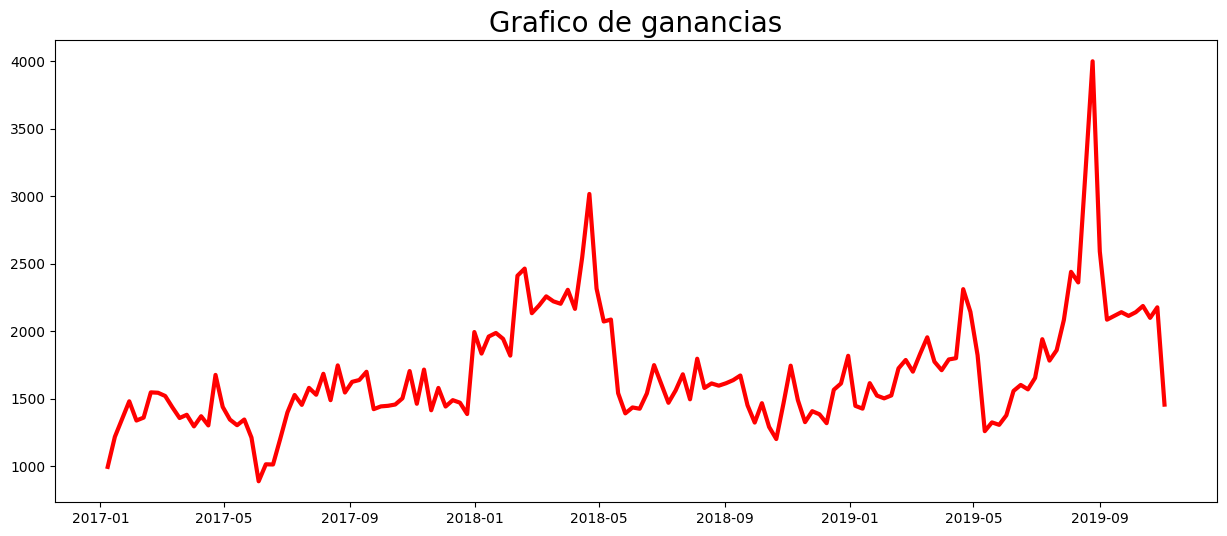

In [13]:
# Genera la gráfica de ganacias hasta la última fecha con dato

plt.figure(figsize=(15,6))
plt.plot(data3, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

Text(0.5, 1.0, 'Grafico de ganancias')

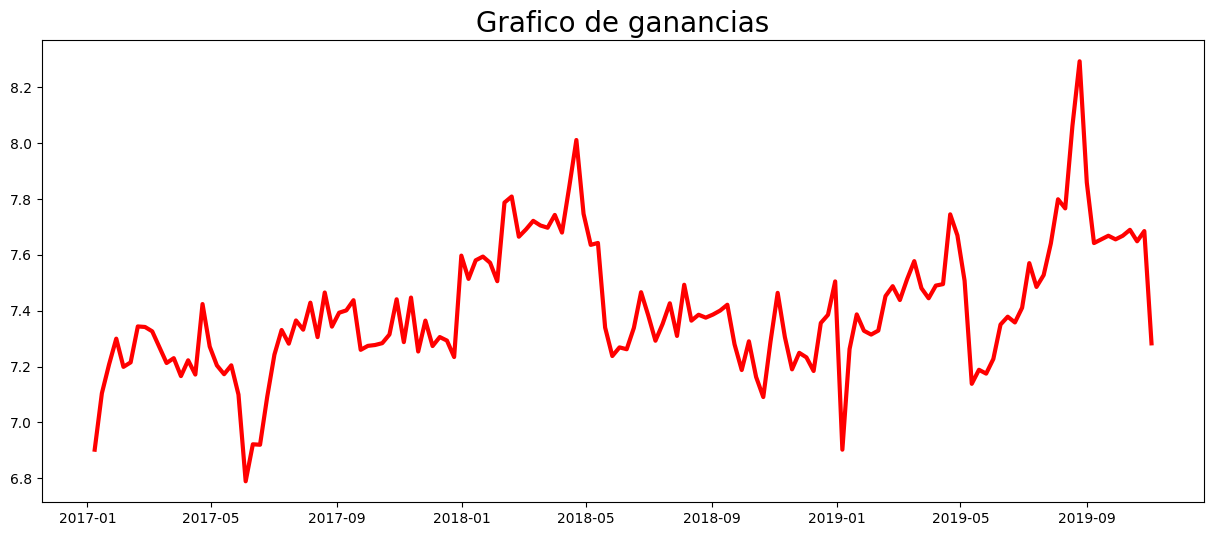

In [71]:
data3['data3_log'] = np.log(data3)

plt.figure(figsize=(15,6))
plt.plot(data3['data3_log'], lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

Text(0.5, 1.0, 'Grafico de ganancias')

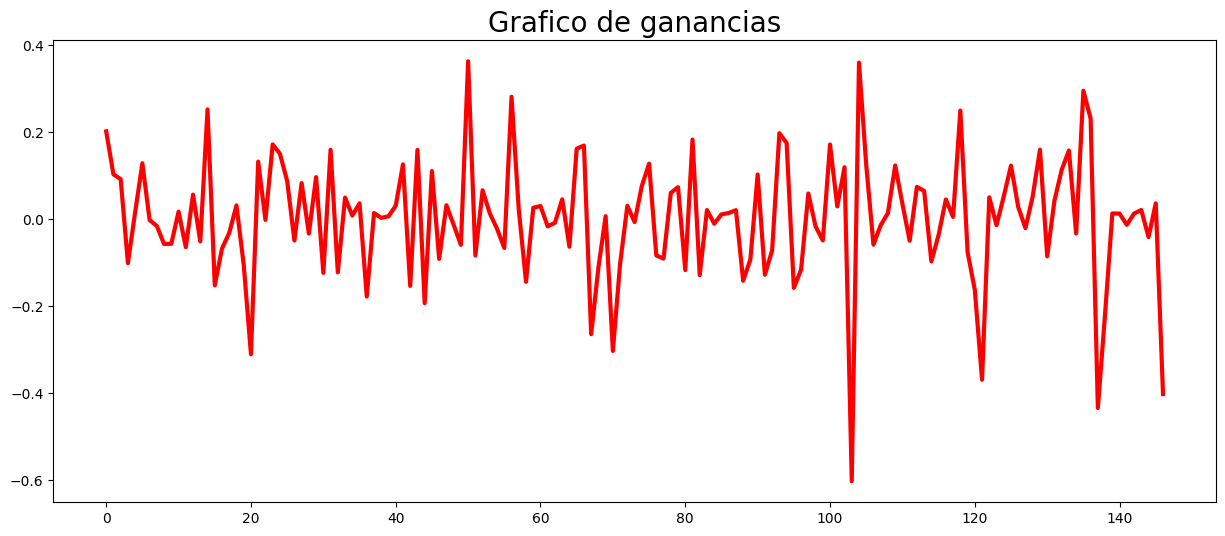

In [77]:
data3_diff = np.diff(data3['data3_log'])

plt.figure(figsize=(15,6))
plt.plot(data3_diff, lw=3, color="r",)
plt.title("Grafico de ganancias", fontsize=20)

In [78]:
data3_diff

array([ 0.20204539,  0.10323465,  0.09240623, -0.10107556,  0.01605871,
        0.12878551, -0.00196761, -0.01556594, -0.05700127, -0.05648167,
        0.01736238, -0.06421837,  0.05656085, -0.05109122,  0.25255398,
       -0.15227848, -0.06746165, -0.0315547 ,  0.03182974, -0.10474792,
       -0.31056168,  0.1324471 , -0.00157925,  0.17199686,  0.15070977,
        0.08821603, -0.04893066,  0.08309875, -0.03296369,  0.0967982 ,
       -0.12342083,  0.15974182, -0.12222794,  0.04981265,  0.00834393,
        0.03654751, -0.17781003,  0.01420088,  0.00310091,  0.00661946,
        0.03099902,  0.12609256, -0.15332275,  0.15952867, -0.19314277,
        0.11069723, -0.09118951,  0.03220988, -0.01268082, -0.05892543,
        0.36325177, -0.08331834,  0.06653972,  0.01341111, -0.02219027,
       -0.06610667,  0.281696  ,  0.02162706, -0.14388577,  0.02642143,
        0.03032818, -0.01651409, -0.00801761,  0.0457993 , -0.06325358,
        0.16213931,  0.16945402, -0.26433175, -0.11128586,  0.00

In [79]:
len(data3_diff)

147

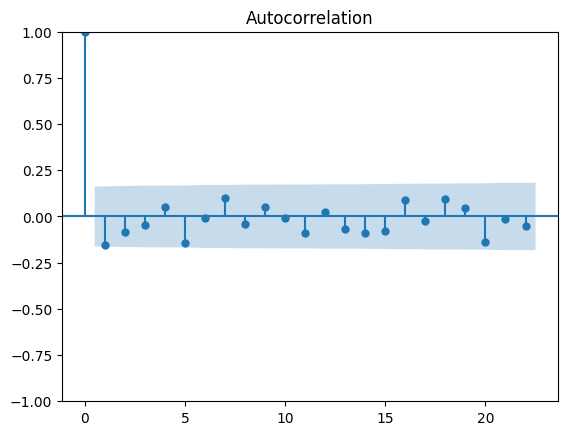

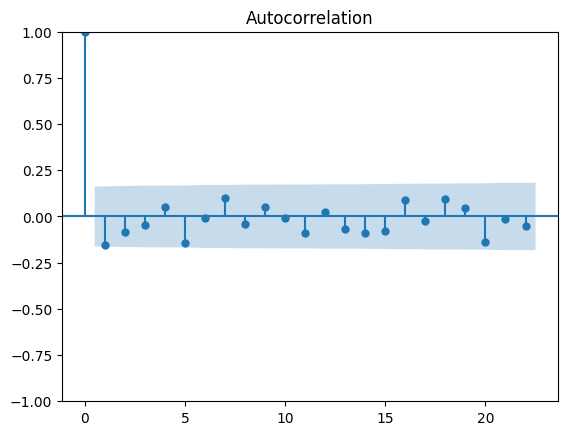

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Grafico de correlación de la serie temporal, parecer llegar a estar totalmente correlacionado

plot_acf(data3_diff)       # Se ve claramente que solo hay que diferenciar una vez

In [70]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("2nd order differencing")
ax1.plot(data3_diff.diff())

ax2= f.add_subplot(122)
plot_pacf(data3_diff.diff()), ax=ax2)
plt.show()

SyntaxError: cannot assign to function call (1553912933.py, line 7)

Ahora se utilizará el test de dickey-fuller para comprobar si 
realmente esta serie es estacional o se rechaza la hipótesis.

In [341]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data3.dropna())
print('p-value: ',result[1])

result = adfuller(data3.diff().dropna())
print('p-value: ',result[1])

result = adfuller(data3.diff().diff().dropna())
print('p-value: ',result[1])


p-value:  0.0013071090635834546
p-value:  1.733412613424449e-05
p-value:  4.118749957601164e-15


Como se puede observar el valor recae después de diferenciar por segunda vez la
serie temporal, ahora a continuación con la correlación parcial se verá
que valor debería de tener p.

In [88]:
from statsmodels.tsa.arima.model import ARIMA
                                
data_train = data3_diff[:103]    # datos ya con logaritmo y después diferenciados

arima_model = ARIMA(data_train, order=(1,0,0),seasonal_order=(0, 1, 0, 52))     # orden de variables es AR = 1,d = 1,MA = 2 
model = arima_model.fit()
print(model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  103
Model:             ARIMA(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                  28.693
Date:                          Fri, 03 Feb 2023   AIC                            -53.385
Time:                                  11:53:26   BIC                            -49.522
Sample:                                       0   HQIC                           -51.909
                                          - 103                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2680      0.157     -1.711      0.087      -0.575       0.039
sigma2         0.0190      0.003      5.549      0.

In [91]:
data_test = data3['data3_diff'][103:]

y_pred = pd.Series(model.forecast(44))
y_true = data_test

tabla = pd.DataFrame()
tabla ['y_true'] = y_true
tabla ['y_pred'] = y_pred
tabla

,y_true,y_pred
0,-0.602715,-0.018023
1,0.360252,0.049040
2,0.124320,0.018101
3,-0.058665,-0.023447
4,-0.013614,-0.065770
5,0.014218,0.281606
6,0.123542,0.021651
7,0.035534,-0.143892
8,-0.049618,0.026423
9,0.074377,0.030328


In [92]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [94]:
print('eL MSE es',mse)
print('el RMSE es' ,rmse)
print('el R2 es',np.abs(r2))

eL MSE es 0.04469876939324419
el RMSE es 0.21142083481351642
el R2 es 0.38099829801641416


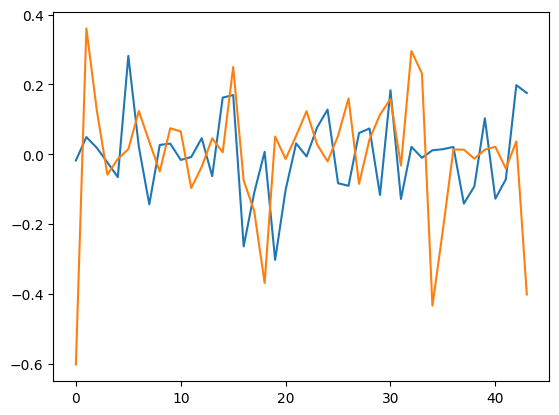

In [97]:
# Aqui se ve que se ajustan las predicciones a la realidad luego
# se puede hacer de predicciones de cara al futuro

plt.plot(y_pred)
plt.plot(y_true)
plt.show()